In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt


#无监督算法，学习过程就是训练质心的位置，进行聚类
class Kmeans:
    #添加init参数，默认init = 'random'就是标准Kmeans，init = 'Kmeans++'则为Kmeans++
    def __init__(self,k,init='random'):
        self.k = k
        self.init = init
    
    def calc_distance(self,x1,x2):
        diff = x1 - x2
        distances = np.sqrt(np.square(diff).sum(axis=1))
        return distances
    
    def fit(self,x):
        self.x = x
        m,n = self.x.shape
        
        if self.init == 'random':
            #随机选定k个数据作为初始质心，不重复选取
            self.original_ = np.random.choice(m,self.k,replace=False)
            #默认类别是从0到k-1
            self.original_center = x[self.original_]
        elif self.init == 'Kmeans++':
            first = np.random.choice(m)
            #储存在一个列表中
            index_select = [first]
            #继续选取k-1个点
            for i in range(1,self.k):
                all_distances = np.empty((m,0))
                for j in index_select:
                    #计算每个数据点到已选择的质心的距离
                    distances = self.calc_distance(self.x,x[j]).reshape(-1,1)
                    #把每个数据点到已选择的质心的距离储存在数组中，每个质心一列
                    all_distances = np.c_[all_distances,distances]
                #找到每个点到已选择质心的最小距离
                min_distances = all_distances.min(axis=1).reshape(-1,1)
                #在min_distances里面选取距离较大的点作为下一个质心，我们就选最大的点
                index = np.argmax(min_distances)
                index_select.append(index)
            #生成Kmeans++方法的初始质心，默认类别是从0到k-1
            self.original_center = x[index_select]

        while True:
            #初始化一个字典，以类别作为key，赋值一个空数组
            dict_y = {}
            for j in range(self.k):
                dict_y[j] = np.empty((0,n))
            for i in range(m):
                distances =self.calc_distance(x[i],self.original_center)
                #把第i个数据分配到距离最近的质心，存放在字典中
                label = np.argsort(distances)[0]
                dict_y[label] = np.r_[dict_y[label],x[i].reshape(1,-1)]
            centers = np.empty((0,n))
            #对每个类别的样本重新求质心
            for i in range(self.k):
                center = np.mean(dict_y[i],axis=0).reshape(1,-1)
                centers = np.r_[centers,center]
            #与上一次迭代的质心比较，如果没有发生变化，则停止迭代（也可考虑收敛时停止）
            result = np.all(centers == self.original_center)
            if result == True:
                break
            else:
                #继续更新质心
                self.original_center = centers

    def predict(self,x):
        y_preds = []
        m,n = x.shape
        for i in range(m):
            distances =self.calc_distance(x[i],self.original_center)
            y_pred = np.argsort(distances)[0]
            y_preds.append(y_pred)
        return y_preds


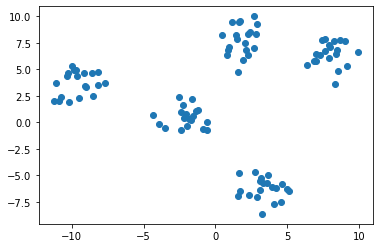

In [3]:
#再次用到此数据集
x,y = make_blobs(centers=5,random_state=20,cluster_std=1)
plt.scatter(x[:,0],x[:,1])
plt.show()


In [14]:
def calc_distance(x1,x2):
    diff = x1 - x2
    distances = np.sqrt(np.square(diff).sum(axis=1))
    return distances

calc_distance(x , x[0]).reshape(-1,1)


array([[ 0.        ],
       [ 6.44779184],
       [12.9036588 ],
       [ 4.62037042],
       [12.92266375],
       [ 1.29613822],
       [18.41710387],
       [14.07570285],
       [17.27018921],
       [15.54308007],
       [ 5.88517199],
       [16.25993823],
       [ 2.10704877],
       [12.24373745],
       [ 5.40125256],
       [10.02135863],
       [12.88635658],
       [13.01350393],
       [12.46286689],
       [17.14353513],
       [18.68817617],
       [14.35070424],
       [ 6.16989062],
       [12.51323273],
       [ 1.15247486],
       [ 5.31365403],
       [12.81899278],
       [17.71910144],
       [13.37421964],
       [15.18236538],
       [12.46615951],
       [ 1.093856  ],
       [12.81451503],
       [ 5.20721101],
       [ 1.02421616],
       [11.06219796],
       [ 0.59550179],
       [17.30071117],
       [ 4.90694807],
       [ 6.46491558],
       [ 5.41006264],
       [12.67358142],
       [ 9.78861489],
       [17.0388709 ],
       [16.53397816],
       [ 6

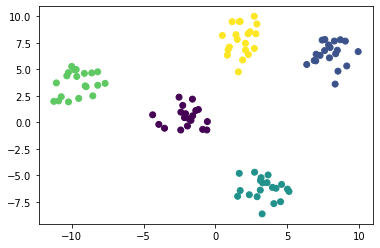

In [4]:
model = Kmeans(k=5,init = 'Kmeans++')
model.fit(x)
y_preds = model.predict(x)
plt.scatter(x[:,0],x[:,1],c=y_preds)
plt.show()
